In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

In [2]:
new_test  = ['9-6','4-5','1-2', '10-7','1-1',
              '6-1','6-6', '9-4','10-4','8-5', 
              '5-3','10-6','2-5','6-2','3-1',
              '8-8', '8-1','8-6','7-6','6-8',
              '7-5','10-1']

test_1 = ['1-1','7-5','9-4','10-1','10-4','10-7']
channel_1 = ['#1', '#50', '#65', '#70', '#73', '#76']
order_1 = [4,20,7,21,8,3]

test_2 = ['1-2', '5-3','6-1','6-6','6-8']
channel_2 = ['#2','#34', '#39', '#44', '#45']
order_2 = [2,10,5,6,19]

test_3 = ['2-5','4-5','7-6','8-1','8-8','9-6']
channel_3 = ['#12', '#28', '#51', '#54', '#61', '#67']
order_3 = [12,1,18,16,15,0]

test_4 = ['3-1','6-2','8-5','8-6','10-6',]
channel_4 = ['#16', '#40', '#58', '#59', '#75']
order_4 = [14,13,9,17,11]

order_our = [4,20,7,21,8,3,2,10,5,6,19,12,1,18,16,15,0,14,13,9,17,11]

order_new_1 = [1,3,4,5,7,12,18]
order_new_2 = [2,6,10,11,17,19,20]
order_new_3 = [9,15,16,21]
order_new_4 = [0,8,13,14]

In [3]:
result=np.load('./npy/real_result_our_0918.npy', allow_pickle=True)
realrul=np.load('./npy/real_realrul_our_0918.npy', allow_pickle=True)

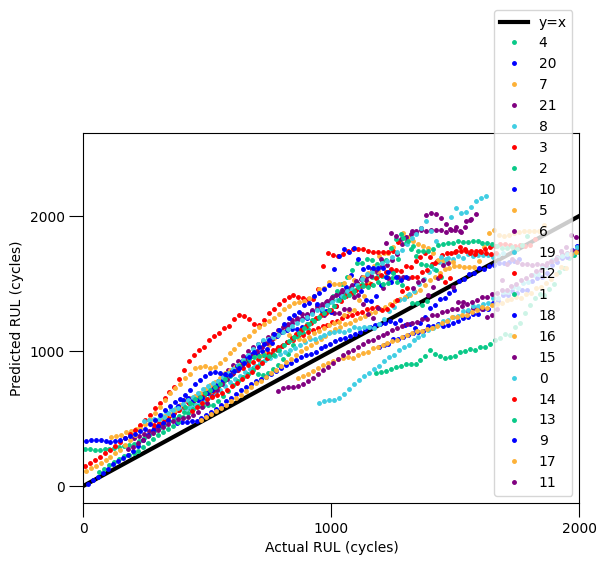

In [63]:
interval =20
x_lim = 2000
colors = ['#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red']
# plt.plot(result[1])
# plt.plot(realrul[1])
plt.style.use('default')
plt.plot(range(x_lim), range(x_lim),'-',c='black', linewidth=3,label='y=x')
color = 0
for i in order_our:
    plt.plot(realrul[i][::20], result[i][::20], '.',markersize=5,label=i, c=colors[color])
    color = color +1
plt.legend(fontsize=10,loc="lower right")
x_major_locator=MultipleLocator(400)
y_major_locator=MultipleLocator(400)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim((0,x_lim))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.xticks([0,1000,2000],size=10)
plt.yticks([0,1000,2000],size=10)
# plt.gca().set_facecolor('white')
plt.ylabel('Predicted RUL (cycles)',fontsize=10,family='Avenir')
plt.xlabel('Actual RUL (cycles)',fontsize=10,family='Avenir')
plt.savefig("./figure/real-our-order_mlp-pa.png",dpi=1200,bbox_inches='tight')
plt.show()


<Figure size 900x300 with 0 Axes>

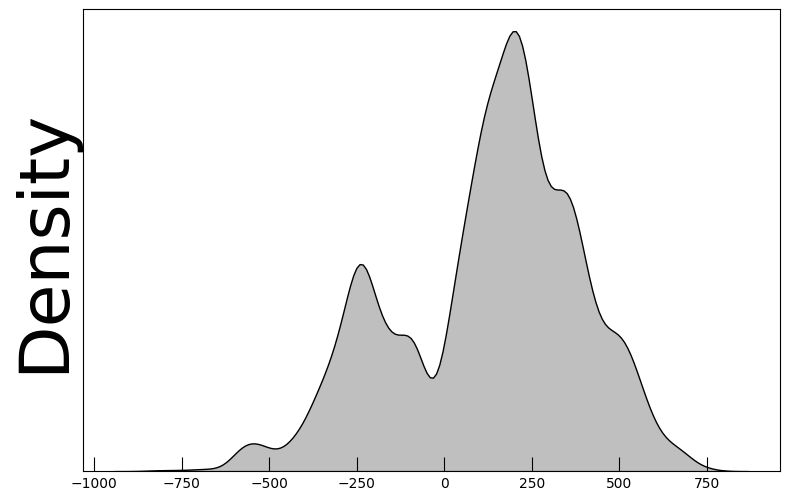

In [64]:
g = plt.figure(figsize=(9,3))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=0.3, vmax=1)
error_list = []

colors = ['k','mediumpurple','red','chocolate','limegreen','steelblue',]
label_names = ['#1', '#50','#65','#70', '#73', '#76' ]

for i in order_our:
    interval = 1
    rul_true = realrul[i]
    rul_pred = result[i]
    tmp = rul_pred[::interval] - rul_true[::interval]
    error_list.append(tmp.reshape(-1,1))
    
error_array = np.vstack(error_list)

fig = plt.figure(figsize=(9,6))
sns.kdeplot(error_array.squeeze(),shade=True,color='k')

plt.yticks([],size=50)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.ylabel('Density',fontsize=50,family='Avenir')
plt.savefig("./figure/real-our-order_mlp-dens.png",dpi=1200,bbox_inches='tight')
plt.show()

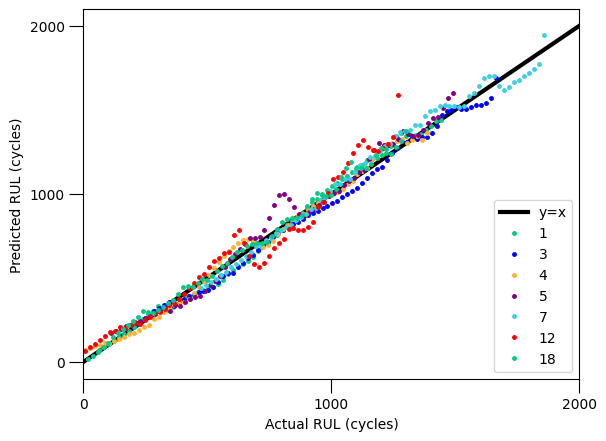

In [30]:
interval =20
x_lim = 2000
colors = ['#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red']
# plt.plot(result[1])
# plt.plot(realrul[1])
plt.style.use('default')
plt.plot(range(x_lim), range(x_lim),'-',c='black', linewidth=3,label='y=x')
color = 0
for i in order_new_1:
    plt.plot(realrul[i][::20], result[i][::20], '.',markersize=5,label=i, c=colors[color])
    color = color +1
plt.legend(fontsize=10,loc="lower right")
x_major_locator=MultipleLocator(400)
y_major_locator=MultipleLocator(400)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim((0,x_lim))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.xticks([0,1000,2000],size=10)
plt.yticks([0,1000,2000],size=10)
# plt.gca().set_facecolor('white')
plt.ylabel('Predicted RUL (cycles)',fontsize=10,family='Avenir')
plt.xlabel('Actual RUL (cycles)',fontsize=10,family='Avenir')
plt.savefig("./figure/real-our-order_new_1_cap-pa.png",dpi=1200,bbox_inches='tight')
plt.show()


<Figure size 900x300 with 0 Axes>

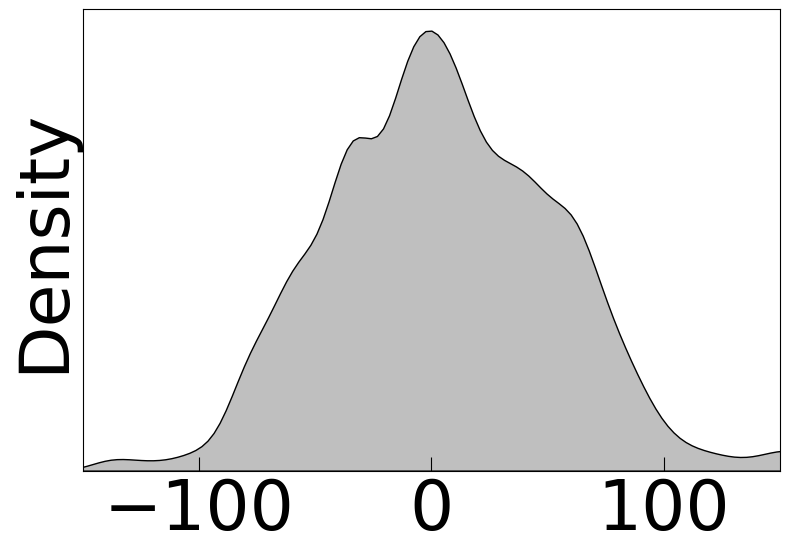

In [31]:
g = plt.figure(figsize=(9,3))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=0.3, vmax=1)
error_list = []

colors = ['k','mediumpurple','red','chocolate','limegreen','steelblue',]
label_names = ['#1', '#50','#65','#70', '#73', '#76' ]

for i in order_new_1:
    interval = 1
    rul_true = realrul[i]
    rul_pred = result[i]
    tmp = rul_pred[::interval] - rul_true[::interval]
    error_list.append(tmp.reshape(-1,1))
    
error_array = np.vstack(error_list)

fig = plt.figure(figsize=(9,6))
sns.kdeplot(error_array.squeeze(),shade=True,color='k')
plt.xticks([-100, 0, 100],size=50)
plt.yticks([],size=50)
plt.xlim(-150,150)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.ylabel('Density',fontsize=50,family='Avenir')
plt.savefig("./figure/real-our-order_new_1_cap-dens.png",dpi=1200,bbox_inches='tight')
plt.show()

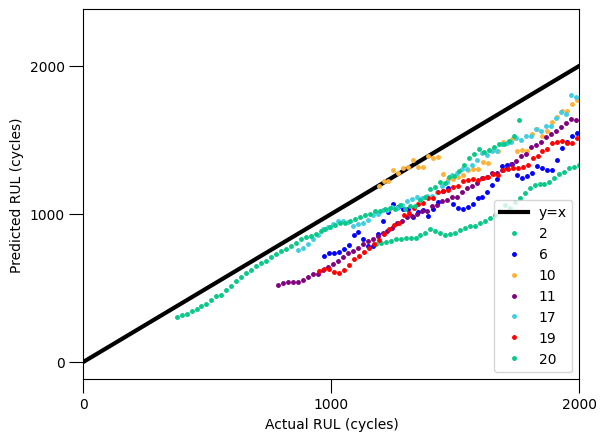

In [32]:
interval =20
x_lim = 2000
colors = ['#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red']
# plt.plot(result[1])
# plt.plot(realrul[1])
plt.style.use('default')
plt.plot(range(x_lim), range(x_lim),'-',c='black', linewidth=3,label='y=x')
color = 0
for i in order_new_2:
    plt.plot(realrul[i][::20], result[i][::20], '.',markersize=5,label=i, c=colors[color])
    color = color +1
plt.legend(fontsize=10,loc="lower right")
x_major_locator=MultipleLocator(400)
y_major_locator=MultipleLocator(400)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim((0,x_lim))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.xticks([0,1000,2000],size=10)
plt.yticks([0,1000,2000],size=10)
# plt.gca().set_facecolor('white')
plt.ylabel('Predicted RUL (cycles)',fontsize=10,family='Avenir')
plt.xlabel('Actual RUL (cycles)',fontsize=10,family='Avenir')
plt.savefig("./figure/real-our-order_new_2_cap-pa.png",dpi=1200,bbox_inches='tight')
plt.show()


<Figure size 900x300 with 0 Axes>

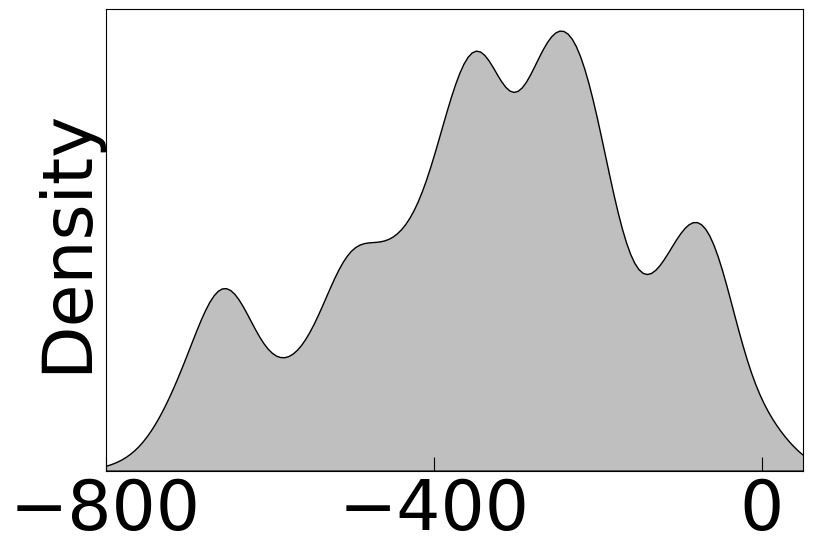

In [33]:
g = plt.figure(figsize=(9,3))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=0.3, vmax=1)
error_list = []

colors = ['k','mediumpurple','red','chocolate','limegreen','steelblue',]
label_names = ['#1', '#50','#65','#70', '#73', '#76' ]

for i in order_new_2:
    interval = 1
    rul_true = realrul[i]
    rul_pred = result[i]
    tmp = rul_pred[::interval] - rul_true[::interval]
    error_list.append(tmp.reshape(-1,1))
    
error_array = np.vstack(error_list)

fig = plt.figure(figsize=(9,6))
sns.kdeplot(error_array.squeeze(),shade=True,color='k')
plt.xticks([-800, -400,0],size=50)
plt.yticks([],size=50)
plt.xlim(-800,50)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.ylabel('Density',fontsize=50,family='Avenir')
plt.savefig("./figure/real-our-order_new_2_cap-dens.png",dpi=1200,bbox_inches='tight')
plt.show()

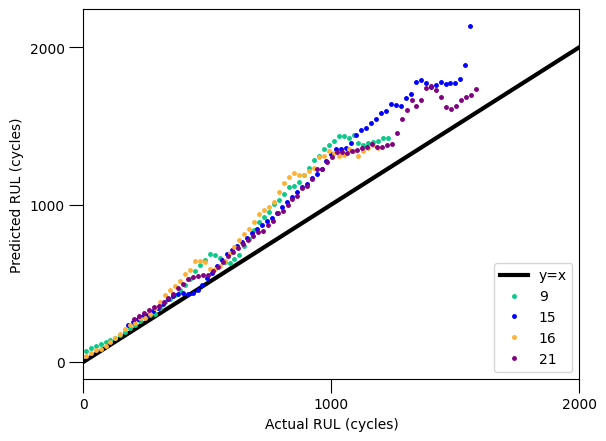

In [34]:
interval =20
x_lim = 2000
colors = ['#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red']
# plt.plot(result[1])
# plt.plot(realrul[1])
plt.style.use('default')
plt.plot(range(x_lim), range(x_lim),'-',c='black', linewidth=3,label='y=x')
color = 0
for i in order_new_3:
    plt.plot(realrul[i][::20], result[i][::20], '.',markersize=5,label=i, c=colors[color])
    color = color +1
plt.legend(fontsize=10,loc="lower right")
x_major_locator=MultipleLocator(400)
y_major_locator=MultipleLocator(400)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim((0,x_lim))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.xticks([0,1000,2000],size=10)
plt.yticks([0,1000,2000],size=10)
# plt.gca().set_facecolor('white')
plt.ylabel('Predicted RUL (cycles)',fontsize=10,family='Avenir')
plt.xlabel('Actual RUL (cycles)',fontsize=10,family='Avenir')
plt.savefig("./figure/real-our-order_new_3_cap-pa.png",dpi=1200,bbox_inches='tight')
plt.show()


<Figure size 900x300 with 0 Axes>

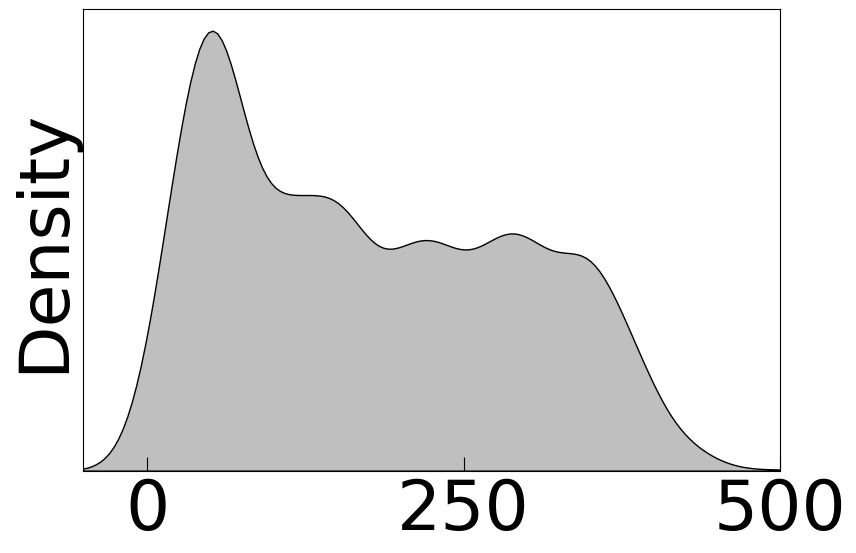

In [35]:
g = plt.figure(figsize=(9,3))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=0.3, vmax=1)
error_list = []

colors = ['k','mediumpurple','red','chocolate','limegreen','steelblue',]
label_names = ['#1', '#50','#65','#70', '#73', '#76' ]

for i in order_new_3:
    interval = 1
    rul_true = realrul[i]
    rul_pred = result[i]
    tmp = rul_pred[::interval] - rul_true[::interval]
    error_list.append(tmp.reshape(-1,1))
    
error_array = np.vstack(error_list)

fig = plt.figure(figsize=(9,6))
sns.kdeplot(error_array.squeeze(),shade=True,color='k')
plt.xticks([0, 250,500],size=50)
plt.yticks([],size=50)
plt.xlim(-51,500)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.ylabel('Density',fontsize=50,family='Avenir')
plt.savefig("./figure/real-our-order_new_3_cap-dens.png",dpi=1200,bbox_inches='tight')
plt.show()

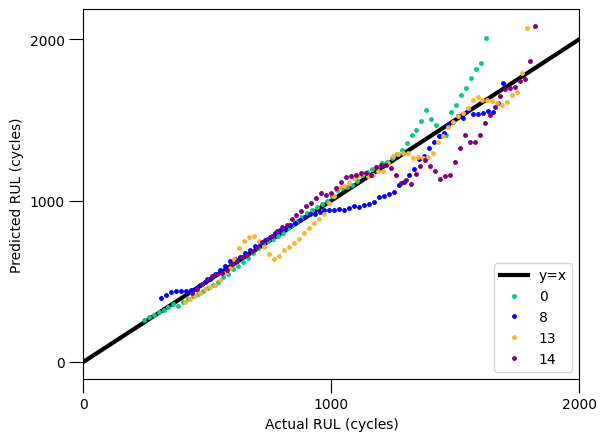

In [36]:
interval =20
x_lim = 2000
colors = ['#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red',
        '#09C988','b','#FDB137','PURPLE','#40CEE3','red']
# plt.plot(result[1])
# plt.plot(realrul[1])
plt.style.use('default')
plt.plot(range(x_lim), range(x_lim),'-',c='black', linewidth=3,label='y=x')
color = 0
for i in order_new_4:
    plt.plot(realrul[i][::20], result[i][::20], '.',markersize=5,label=i, c=colors[color])
    color = color +1
plt.legend(fontsize=10,loc="lower right")
x_major_locator=MultipleLocator(400)
y_major_locator=MultipleLocator(400)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim((0,x_lim))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.xticks([0,1000,2000],size=10)
plt.yticks([0,1000,2000],size=10)
# plt.gca().set_facecolor('white')
plt.ylabel('Predicted RUL (cycles)',fontsize=10,family='Avenir')
plt.xlabel('Actual RUL (cycles)',fontsize=10,family='Avenir')
plt.savefig("./figure/real-our-order_new_4_cap-pa.png",dpi=1200,bbox_inches='tight')
plt.show()


<Figure size 900x300 with 0 Axes>

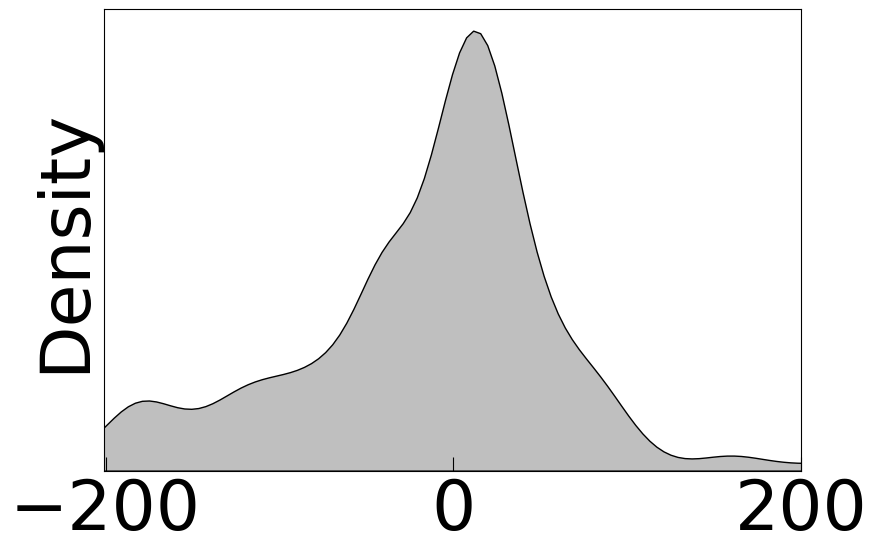

In [37]:
g = plt.figure(figsize=(9,3))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=0.3, vmax=1)
error_list = []

colors = ['k','mediumpurple','red','chocolate','limegreen','steelblue',]
label_names = ['#1', '#50','#65','#70', '#73', '#76' ]

for i in order_new_4:
    interval = 1
    rul_true = realrul[i]
    rul_pred = result[i]
    tmp = rul_pred[::interval] - rul_true[::interval]
    error_list.append(tmp.reshape(-1,1))
    
error_array = np.vstack(error_list)

fig = plt.figure(figsize=(9,6))
sns.kdeplot(error_array.squeeze(),shade=True,color='k')
plt.xticks([-200, 0, 200],size=50)
plt.yticks([],size=50)
plt.xlim(-201,200)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
plt.ylabel('Density',fontsize=50,family='Avenir')
plt.savefig("./figure/real-our-order_new_4_cap-dens.png",dpi=1200,bbox_inches='tight')
plt.show()

In [4]:
import os
import time
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from scipy import interpolate
from datetime import datetime
import pandas as pd
from tool import EarlyStopping
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error, r2_score

import torch
import torch.nn.functional as F
import torch.optim as optim

from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, Sampler, TensorDataset
from torch.utils.data.sampler import RandomSampler
    
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')



import numpy as np

In [5]:
life = [1742, 1561, 2678, 1783, 1504, 1609, 2468, 1975, 1811, 1348, 2689, 2285, 1386, 1908, 1938, 1679, 1308, 2365, 1419, 2450, 1875, 1702]

In [6]:

cols = ['index',
        'rmse_after',
        'r2_after',
        'mae_after',]
table_wx = pd.DataFrame(index=[],columns=cols)
table_wx.loc['All',:] = 0

stride = 1
rmse_after_list, r2_after_list, mae_after_list = [], [], []
ind = ['9-6','4-5','1-2', '10-7','1-1',
        '6-1','6-6', '9-4','10-4','8-5', 
        '5-3','10-6','2-5','6-2','3-1',
        '8-8', '8-1','8-6','7-6','6-8',
        '7-5','10-1']
# ind = ['1-2']

for i in range(realrul.shape[0]):
    # A = battery_ids
    # end = A['rul'][1]
    
    # A_rul = A['rul']
    # A_life = A['rul'][1]
    # rul_true = result[battery_ids]['rul']['true']
    # rul_base = result[battery_ids]['rul']['base']
    # rul_pred = result[battery_ids]['rul']['transfer']
    # start = end - len(rul_true)
#     print(battery_ids, A_life, rul_true[0])

###################### MINE ###############################
    # if i ==2:
    #     continue
    rul_true = realrul[i]
    rul_pred = result[i]
    index = ind[i]
    A_life = 2000
    print(index)
    table_wx.loc[(i),['index']] = [index]
    rmse_after = np.sqrt(mean_squared_error(rul_true,rul_pred))
    table_wx.loc[(i),['rmse_after']] = ['%.3g'%rmse_after]
    
    r2_after = r2_score(rul_true,rul_pred)
    table_wx.loc[(i),['r2_after']] = [ '%.3g'%r2_after]
    
    mae_after = mean_absolute_error(rul_true, rul_pred) / life[i] * 100
    table_wx.loc[(i),['mae_after']] = ['%.3g'%mae_after]
    print(i,rmse_after,r2_after,mae_after)
#     print('')
    
    rmse_after_list.append(rmse_after)
    

    r2_after_list.append(r2_after)
    

    mae_after_list.append(mae_after)

table_wx.loc['All',['rmse_after']] = [
                                                                '%.3g'%np.mean(rmse_after_list)]
table_wx.loc['All',['r2_after']] = [
                                                        '%.3g'%np.mean(r2_after_list)]   
table_wx.loc['All',['mae_after']] = [
                                                            '%.3g'%np.mean(mae_after_list)]


9-6
0 206.06593 0.7362671231203008 9.898912537111618
4-5
1 152.17264 0.8561781039690637 7.698650958826724
1-2
2 579.33325 -1.0845328766387556 21.084261973283468
10-7
3 56.316387 0.980302029796481 2.586709202773372
1-1
4 107.46856 0.9276444027947225 6.425870733058199
6-1
5 205.89265 0.7367104794709296 11.462293284660989
6-6
6 276.3802 0.525577053836737 9.108203040915912
9-4
7 39.344215 0.9903857894059871 1.5661421184298359
10-4
8 101.652756 0.9358214035086626 4.89967047082068
8-5
9 327.04114 0.14888228016910432 21.092715390711934
5-3
10 379.1188 0.10730613607173678 13.421790880889157
10-6
11 311.05338 0.39907301978604515 13.330242399052928
2-5
12 400.16162 -0.19890557857645508 25.7205715427151
6-2
13 219.49654 0.7007685935953565 10.575902686928803
3-1
14 136.53839 0.8842125867072826 6.450207043973531
8-8
15 250.79341 0.609353376701395 12.024306569374907
8-1
16 333.19376 0.056064327599360864 22.625153801127677
8-6
17 283.8741 0.49950066595784837 11.434933942669794
7-6
18 140.93135 0.8587

In [7]:
table_wx

,index,rmse_after,r2_after,mae_after
All,0,239,0.513,11.5
0,9-6,206,0.736,9.9
1,4-5,152,0.856,7.7
2,1-2,579,-1.08,21.1
3,10-7,56.3,0.98,2.59
4,1-1,107,0.928,6.43
5,6-1,206,0.737,11.5
6,6-6,276,0.526,9.11
7,9-4,39.3,0.99,1.57
8,10-4,102,0.936,4.9


In [14]:
import pandas as pd

# 假设 table_wx 是您的 DataFrame
table_wx.to_excel("./results/real_OUR_cap.xlsx", engine='openpyxl')
